# Vecinos más cercanos

**K-Vecinos más cercanos** es un algoritmo basado en instancias de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del aprendizaje automático. Sirve esencialmente para clasificar valores buscando los puntos "más similares" (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basados en esa clasificación.

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. 
Es un algoritmo:
- **Supervisado:** esto quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada "una fila" de datos.

- **Basado en instancia:** quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo, en regresión logística o árboles de decisión). En cambio memoriza las instancias de enetrenamiento que son usadas como "base de conocimiento" para la fase de predicción.

**Aplicación:** En sistemas de recomendación, búsqueda semántica y detección de anomalías.

**¿Cómo funciona KNN?**

1. Calcular la distancia entre el ítem a clasificar y el resto de ítems del dataset de entrenamiento.
2. Seleccionar los 'K' elementos más cercanos (con menor distancia, según la función que se use).
3. Realizar una 'votación de la mayoría' entre los K puntos: los de una clase/etiqueta que dominen, decidirán su clasificación final.

Según el punto 3, para decidir la clase de un punto es muy importante el valor de K, ya que definirá a qué grupo pertenecerán los puntos, sobre todo en las 'fronteras' entre grupos. Por tanto, cuanto más puntos K, más tardará nuestro algoritmo en procesar y darnos respuesta.

La forma de medir la cercanía entre los puntos, es utilizando la distancia euclidiana.



# Ejemplo de aplicación en Python: contextualización

Para este ejercicio, utilizaremos 257 registros con opiniones de usuarios sobre una app(Reviews). Se utilizarán 2 columnas de datos como fuente de alimento del algoritmo. Se utilizarán dos features para el gráfico en 2D, las columnas que se van a utilizar son: **wordcount** con la cantidad de palabras utilizadas y **sentimentvalue** con un valor entre -4 y 4, indicando si el comentario fue valorado como positivo o negativo. 
Las etiquetas serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. 

**Cargue de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)

Review Title  ... sentimentValue
0                Sin conexión  ...      -0.486389
1                faltan cosas  ...      -0.586187
2  Es muy buena lo recomiendo  ...      -0.602240
3             Version antigua  ...      -0.616271
4                   Esta bien  ...      -0.651784
5                       Buena  ...      -0.720443
6               De gran ayuda  ...      -0.726825
7                   Muy buena  ...      -0.736769
8                Ta to guapa.  ...      -0.765284
9            Se han corregido  ...      -0.797961

[10 rows x 7 columns]

In [ ]:
dataframe.describe()

wordcount  Star Rating  sentimentValue
count  257.000000   257.000000      257.000000
mean    11.501946     3.420233        0.383849
std     13.159812     1.409531        0.897987
min      1.000000     1.000000       -2.276469
25%      3.000000     3.000000       -0.108144
50%      7.000000     3.000000        0.264091
75%     16.000000     5.000000        0.808384
max    103.000000     5.000000        3.264579

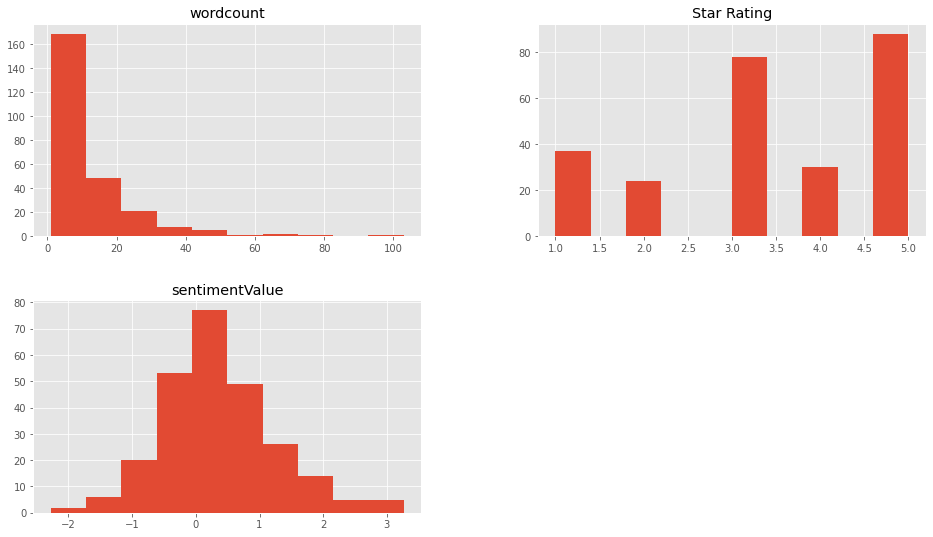

In [ ]:
dataframe.hist()
plt.show()

In [ ]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


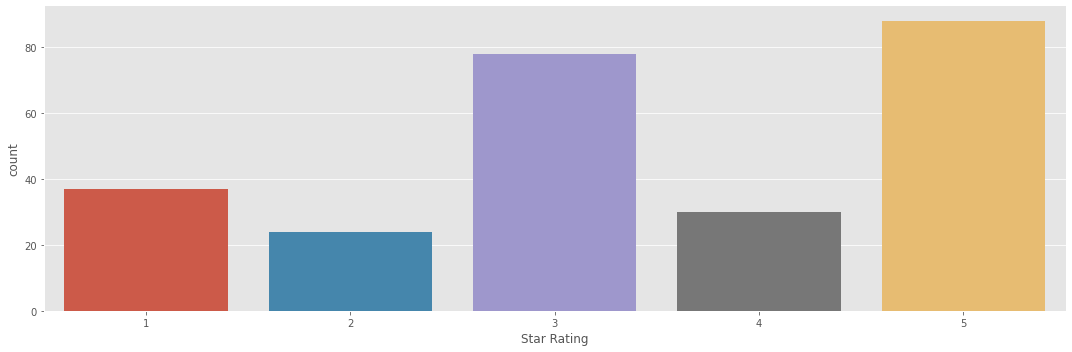

In [ ]:
sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)

A continuación, se grafica la cantidad de palabras.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


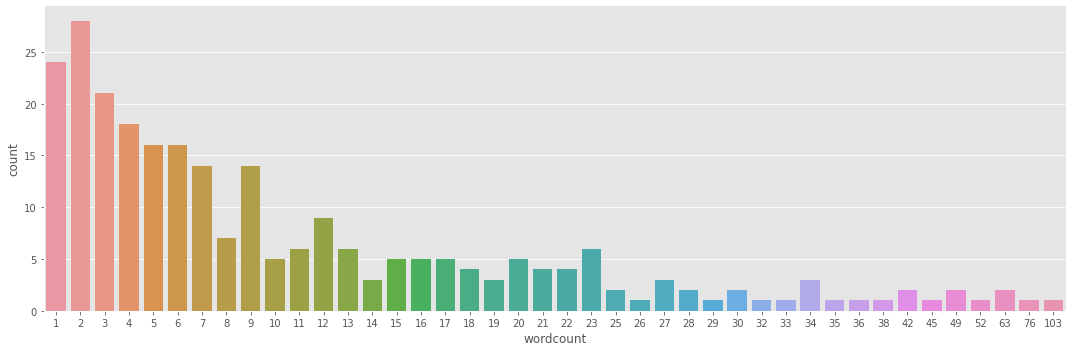

In [ ]:
sb.factorplot('wordcount',data=dataframe,kind="count", aspect=3)

**Se preparan las entradas**

Se crean los X y Y de entrada y los sets de entrenamiento y test.

In [ ]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**K-Vecinos más cercanos**

Se define el valor de K en 7 y se crea el clasificador.

In [ ]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy del clasificador K-NN  en el conjunto de entrenamiento: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy del clasificador K-NN en el conjunto de prueba: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy del clasificador K-NN  en el conjunto de entrenamiento: 0.90
Accuracy del clasificador K-NN en el conjunto de prueba: 0.86


**Precisión del modelo**

Se confirma la precisión con la matriz de confusión y reporte sobre el conjunto de prueba que detalla los aciertos y desaciertos.

In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



**Visualización**

A continuación, se realizará la gráfica con la clasificación obtenida, lo que nos ayuda a ver fácilmente en dónde estarán las predicciones. 

In [ ]:
h = .02  # Tamaño de paso
 
# Creación de colores
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

In [ ]:
 # Se crea una instancia del clasificador de vecinos más cercanos y se ajustan los datos.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
# Se grafica el límite de decisión, asignando color a cada una
# malla de puntos [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


Text(0.5, 1.0, "5-Class classification (k = 7, weights = 'distance')")

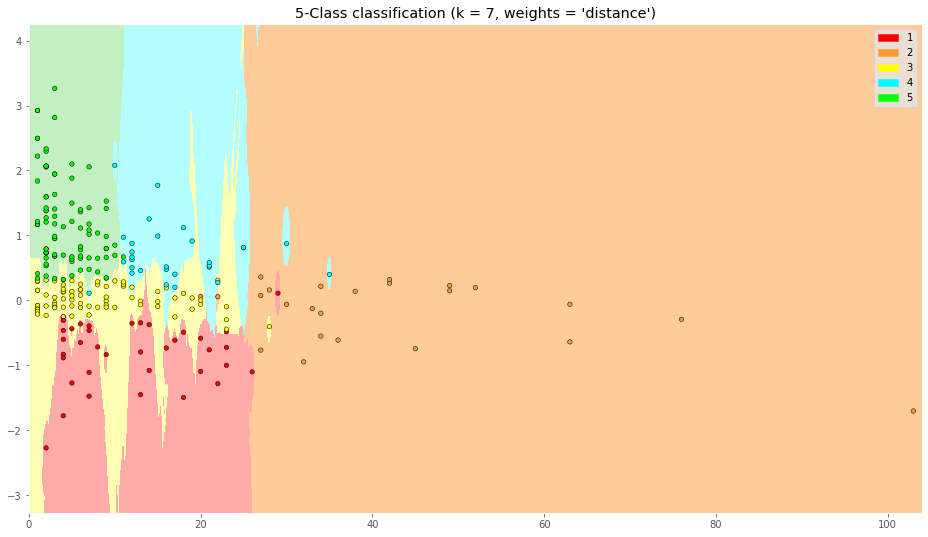

In [ ]:
# el resultado se lleva a un gráfico de colores
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Se trazan los puntos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

Para elegir el mejor K, se indaga la mayor precisión obtenida.

([<matplotlib.axis.XTick at 0x7f7ab508a750>,
 <a list of 5 Text major ticklabel objects>)

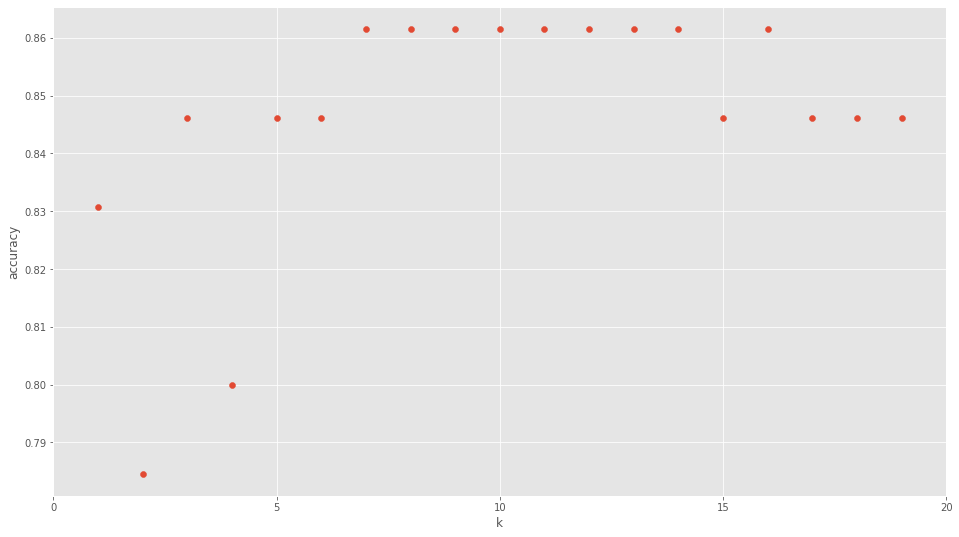

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Se logra ver que la mejor precisión la tienen los K con valores entre 7 y 14

# **Implementación de K-means**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

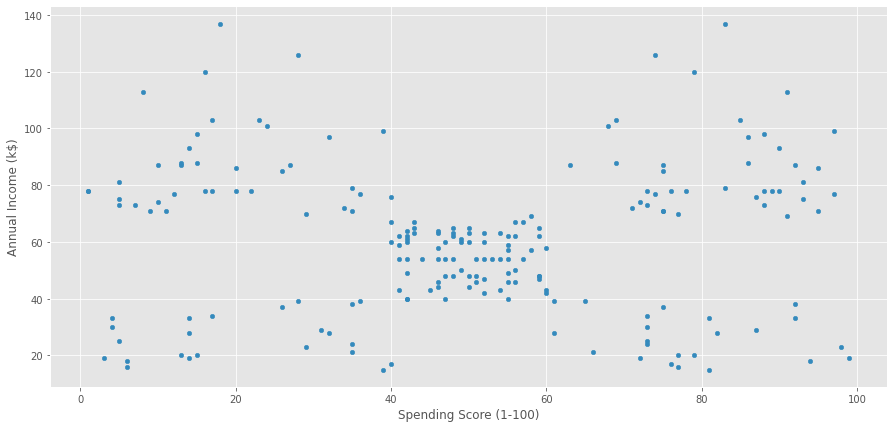

In [ ]:
df.plot.scatter(x='Spending Score (1-100)', y='Annual Income (k$)', figsize=(15,7))

In [ ]:
x = df.filter(['Annual Income (k$)','Spending Score (1-100)'])
x

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

**K-Means**

Es un algoritmo de clasificación no supervisado.


**Método del codo**



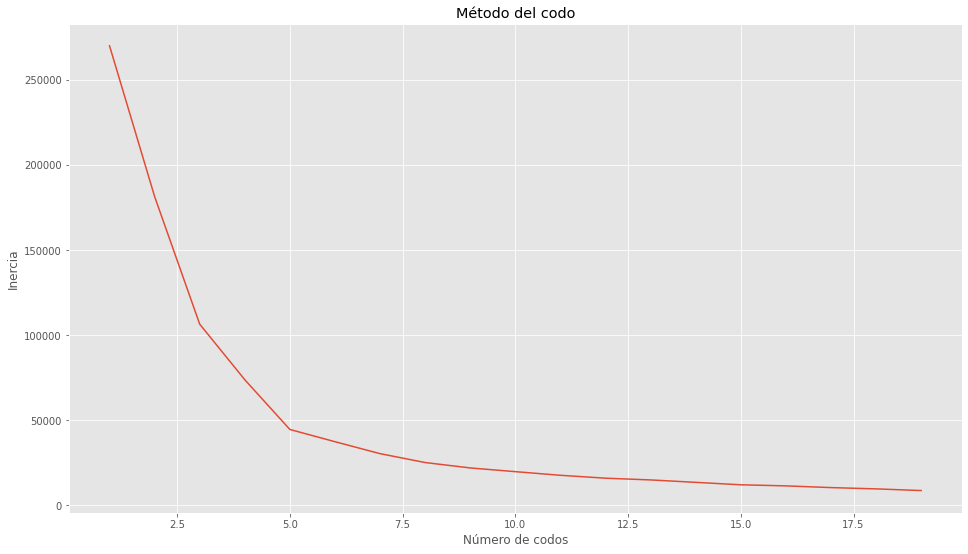

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
#init = 'k-means++' selecciona los centros de clústeres iniciales para el 
#clustering de k-mean de una manera inteligente para acelerar la convergencia.
#Es un algoritmo que se utiliza para la selección de los valores iniciales (o "semillas") 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Gráfica de la suma de las distancias
#Inercia: Inercia disminuye a medida que aumenta la cantidad de clusters
#Minimizar la inercia
#Se identifica el punto donde la inercia deja de bajar de manera drástica 

plt.plot(range(1, 20), wcss)
plt.title('Método del codo')
plt.xlabel('Número de codos')
plt.ylabel('Inercia')
plt.show()

In [ ]:
#Importar la clase KMeans de la librería 
#PARÁMETROS:
#n_clusters=número de clusters

from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5)  

In [ ]:
#Método fit(data) genera los clusters mediante KMeans
#Atributos cluster_centers_, labels_, inertia_

clusters = kmeans.fit(x)
centroids = kmeans.cluster_centers_

In [ ]:
#Generación del dataset con los clusters

ClusterDataset = pd.DataFrame(data=clusters.labels_)
dfClustered = pd.concat([df, ClusterDataset], axis=1)
dfClustered.rename(columns={0:'Cluster'}, inplace=True)
dfClustered

CustomerID  Gender  ...  Spending Score (1-100)  Cluster
0             1    Male  ...                      39        2
1             2    Male  ...                      81        3
2             3  Female  ...                       6        2
3             4  Female  ...                      77        3
4             5  Female  ...                      40        2
..          ...     ...  ...                     ...      ...
195         196  Female  ...                      79        1
196         197  Female  ...                      28        4
197         198    Male  ...                      74        1
198         199    Male  ...                      18        4
199         200    Male  ...                      83        1

[200 rows x 6 columns]

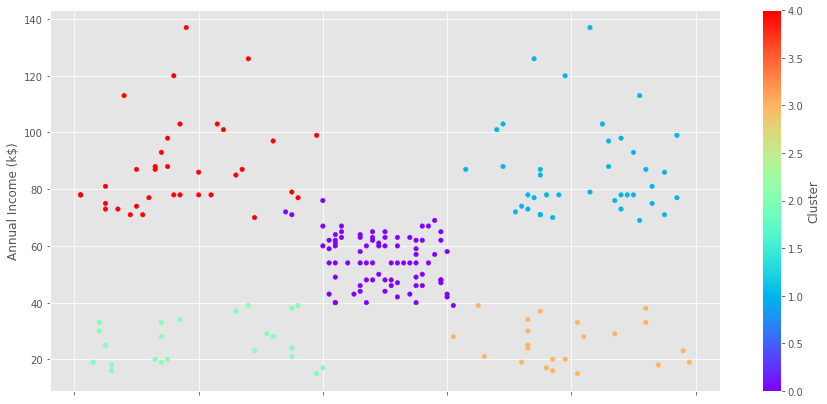

In [ ]:
dfClustered.plot.scatter(x='Spending Score (1-100)', y='Annual Income (k$)', c='Cluster', cmap="rainbow", figsize=(15,7))

**Centroides**

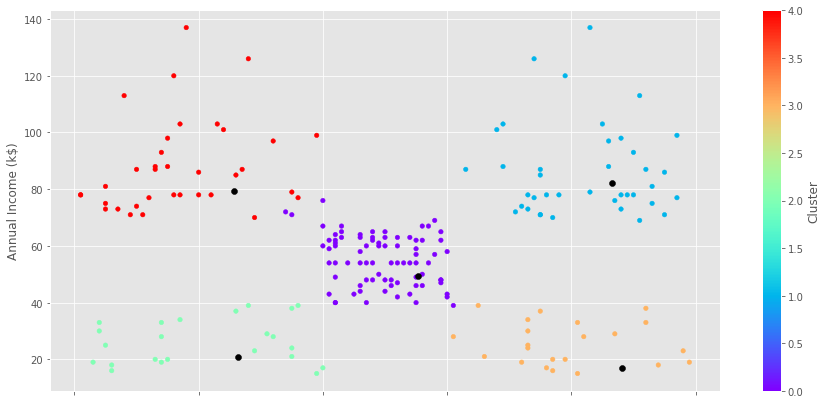

In [ ]:
dfClustered.plot.scatter(x='Spending Score (1-100)', y='Annual Income (k$)', c='Cluster', cmap="rainbow", figsize=(15,7))
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color='black')
plt.show()